In [4]:
import sys
import random
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze

# Recursive Division
## How does it work?
The Recursive Division algorithm is one of the few maze generation algorithms that can be solely done with the process of 'wall adding',i.e., adding walls in an empty grid, unlike most others that seek to carve passages in a filled grid. As the name suggests, the algorithm revolves closely around repeating the same process by recursively splitting the maze into two halfs. This is particularly interesting as it acquires a seemilngly fractal nature, with the only limit to the number of divisions being our height/width requirements, else the process could continue infinitely to produce greater detail.
The algorithm begins with an empty grid. We then randomly choose a row/column, depending on the current height/width of the grid, and add a wall in that row/column. A single gap is randonly carved through this wall, and this process is repeated for the two halves that were created. This is done with function recursion, with the limit being that the length/breadth of the grid less than or equal to 1.
## Is every node connected?
Yes, every node in the graph has to be connected. As this algorithm is a wall adder, to prove that every node is connected, we must prove that there can't exist any islands or isolated paths, and our algorithm would always produce a connected graph. As the recursive division, which operates on an empty grid, doesn't occur whenever the graph size is 1 or less, and we also always carve a path in any wall that we create between two boundaries, we see that there can't be any islands formed. There is also no possibility of isolated edges as all walls drawn originate within the boundary of the parent unit from which the recursion occured. As long as the first parent is within valid boundaries, every reccursive division will always be connected to the boundary. 

In [5]:
INF = float('inf')
# Parent function for Recursive Division Algorithm
def RecursiveDivision(maze):
    # Carve out the entire maze to create empty grid
    for x in range(0,maze.num_columns):
        for y in range(0,maze.num_rows): 
            if(y != maze.num_rows - 1):
                maze.add_path((x,y), 'S', 0)
            if(x != maze.num_columns - 1):
                maze.add_path((x,y), 'E', 0)
            if(y != 0):
                maze.add_path((x,y), 'N', 0)
            if(x != 0):
                maze.add_path((x,y), 'W', 0)
    # function call for recursive division
    divide(maze, 0, 0, maze.num_columns, maze.num_rows,direction(maze.num_columns,maze.num_rows))

# recursive function to generate wall, carve passage, and repeat
def divide(maze, x0, y0, x1, y1, chk):
    # exit condition if length/breadth is too small
    if (x1 - x0) < 2 or (y1 - y0) < 2:
        return
    if chk == 0:
        # generate random column and build wall
        x = random.randint(x0,x1-2)
        for i in range(y0,y1):
            maze.add_path((x,i), 'E', INF)
        # generate random cell and create passage
        y2 = random.randint(y0,y1-1)
        maze.add_path((x,y2),'E',0)
        # recursively call divide() for the two halves formed
        divide(maze, x0, y0, x+1, y1, direction(x + 1 - x0, y1 - y0))
        divide(maze, x + 1 , y0, x1, y1, direction(x1 - x - 1, y1 - y0))
    else:
        # generate random row and build wall
        y = random.randint(y0,y1-2)
        for j in range(x0,x1):
            maze.add_path((j,y), 'S', INF)
        # generate random cell and create passage
        x2 = random.randint(x0,x1-1)
        maze.add_path((x2,y),'S',0)
        # recursively call divide() for the two halves formed
        divide(maze, x0 , y0, x1, y+1, direction(x1 - x0, y + 1 - y0))
        divide(maze, x0 , y+1, x1, y1, direction(x1 - x0, y1 - y - 1))

# function to decide direction of wall addition biased on the larger of height/width        
def direction(length, breadth):
    if length > breadth:
        return 0
    elif breadth > length:
        return 1
    else:
        return random.randint(0,1)

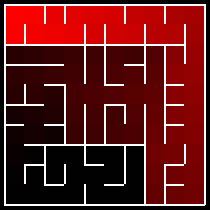

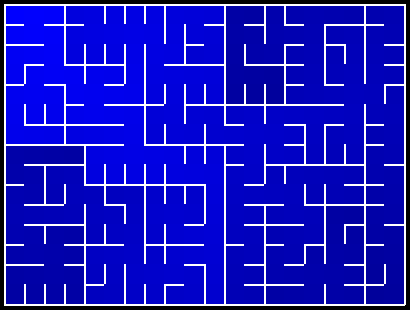

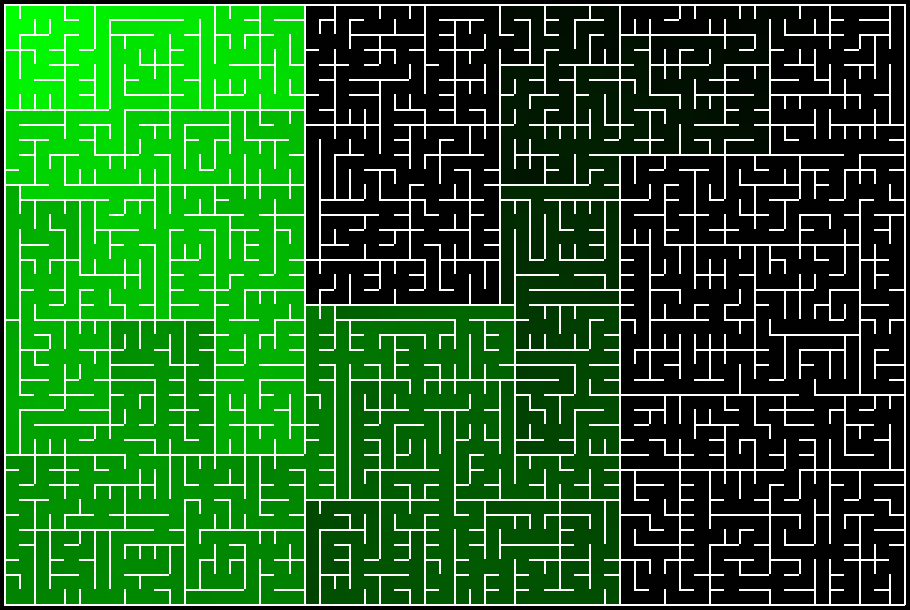

In [6]:
maze = Maze(10,10)
RecursiveDivision(maze)
maze.add_colors()
display(maze.draw(cell_width = 20))
        
maze = Maze(15,20)
RecursiveDivision(maze)
maze.add_colors(color=(0, 0, 255))
display(maze.draw(cell_width = 20))

maze = Maze(40,60)
RecursiveDivision(maze)
maze.add_colors(color=(0, 255, 0))
display(maze.draw(cell_width = 15))

## Basic Analysis

### Time Complexity : O(NlogN)

In this algorithm, we get the multiply the complexity of creating recursive levels, times the complexity of each of the divided functions. For an N<sup>2</sup> grid, the time complexity of recursively splitting to unit grids will be 2logN, and the complexity of each of these functions is N, as we construct a wall along each row, with size N. Thus, overall complexity comes out to be O(NlogN). This is consistent with all divide-and-conquer algorithms.

### Additional Space : O(logN)

The additional space here is O(logN). This comes out to be so due to the recursive division and thus creation of many child functions, which are equal to logN in number, if N is the number of rows/columns. Besides this, only constant auxilliary space is used in each function, and thus the total complexity comes out to be O(logN). 

### Bias

This algorithm revolves around the creation and propagation of fractals. This results in mazes built in a very 'blocky' nature, with each subpart of the maze mimicking the maze itself. This algorithm is much better when used to generate mazes of large sizes, and often results in trivial mazes at smaller sizes. This is mostly due to the fact that at divisions where length or breadth is small, there is almost always no branching, and thus a large number of 'straight paths' where the walls are virtually useless, towards edges or divisions with close edges. Better fractal patterns can be observed in this maze if there is certain bias given towards the center of the maze, i.e., if we follow a binomial probabilistic distribution in picking random columns/rows, we will achieve more symmetric mazes.

In [7]:
total = {"Deadends": 0, "Straightways": 0, "LeftTurns": 0, "RightTurns": 0, "Junctions": 0, "Crossroads": 0}
for i in range(0, 100):
    maze = Maze(100, 100)
    RecursiveDivision(maze)
    partial = maze.benchmark()
    total["Deadends"] += partial["Deadends"]
    total["Straightways"] += partial["Straightways"]
    total["LeftTurns"] += partial["LeftTurns"]
    total["RightTurns"] += partial["RightTurns"]
    total["Junctions"] += partial["Junctions"]
    total["Crossroads"] += partial["Crossroads"]

div = 0
for i in total:
    div += total[i]

for i in total:
    total[i] /= div
    total[i] *= 100
    round(total[i], 3)

for i in total:
    print("%12s %s %3f" % (i, " : ", total[i]))

    Deadends  :  26.908500
Straightways  :  18.938600
   LeftTurns  :  15.006100
  RightTurns  :  14.961000
   Junctions  :  21.483100
  Crossroads  :  2.702700


### Further analysis
As we can see in the statistics, there is a relatively higher bias of the maze towards deadends and junctions. This can be attributed towards the fractal nature of the algorithm. Whenever the subdivisions become too small, they terminate, creating deadends. There are greater junctions at the meeting points of two or more fractals. In addition, the higher proportion of leftturns and rightturns as compared to straightways means that the maze is more winding in nature, although this can be misleading as a lot of this pattern is within a subdivision having only one effective path.